In [1]:
import numpy as np
from scipy.integrate import quad
import matplotlib.pyplot as plt
import matplotlib

# this is a test

font = {'size': 16, 'family':'Serif'}
#font = {'size': 18, 'family':'Latin Modern Roman'}
axislabelfontsize='large'
matplotlib.rc('font', **font)
matplotlib.rc('text', usetex=True)
cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [2]:
year = 365*24*3600 # Seconds
nobsinyear = 2*12 # Assuming stars are observed twice a month
fstar = (365*24*3600)**(-1)
tobs = 15/fstar
nobstot = nobsinyear*(tobs/year)

h0 = 2.15e-18
beta = 1.23e-3

conversion = (2*(np.pi**2)*(fstar**2))*(2*fstar)/(3*(h0**2))

def Delta_p0(sigma, N, factor):
    Dp0 = (np.sqrt(2/factor)) * ((sigma**2)/N)
    return Dp0

from scipy.integrate import quad

def dfgamma(nI):
    df_gamma = lambda f: (f/ fstar)**nI
    lower_limit = 1/tobs
    upper_limit = 5e-8
    result, error = quad(df_gamma, lower_limit, upper_limit)
    return result

def deltaI0(sigma, N, factor, nI):
    deltaI0 = 8*np.pi * Delta_p0(sigma, N, factor)/dfgamma(nI)/np.sqrt(nobstot)
    return deltaI0

def deltaI0_dipole(sigma, N, factor, nI):
    deltaI0 = (8*np.pi / (4*beta)) * Delta_p0(sigma, N, factor)/dfgamma(nI)/np.sqrt(nobstot)
    return deltaI0
    
def deltaI0_dipoleTimesbeta(sigma, N, factor, nI):
    deltaI0b = (8*np.pi) * Delta_p0(sigma, N, factor)/dfgamma(nI)/np.sqrt(nobstot)
    return deltaI0b


# Test to see if the functions above are working
nI = -7/3
factor00 = 0.65 # proporcionality constant for the Trace[H0 H0]
print(dfgamma(nI))
print(deltaI0( 2e-7, nI, 1000, factor00))

# Conversion between sigma = 50 mas and sigma in radians.
Sig1 = 50*(1/1000)*(1/3600)*(2*np.pi/360) # Values taken from the paper G Mentasti and CR Contaldi 
Sig2 = 0.01*(1/1000)*(1/3600)*(2*np.pi/360) # 'Observing GW with Solar system Astrometry'.
Sig3 = 1*(1/1000)*(1/3600)*(2*np.pi/360) 
print(Sig1, Sig2, Sig3)

8.668261385836204e-07
-2.5061175414844945e-08
2.42406840554768e-07 4.8481368110953605e-11 4.8481368110953594e-09


# Monopole

8.26005870077782e-09


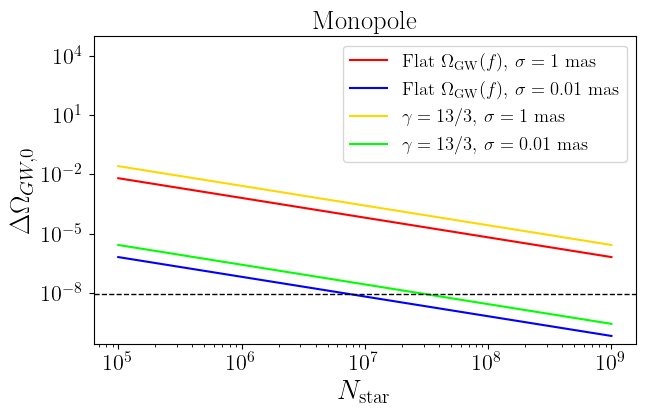

In [14]:
nI_1 = 0
nI_2 = -7/3
nI_3 = -3 # This gives flat \Omega_{GW}(f)
factor00 = 3 # proporcionality constant for the Trace[H0 H0]
N = np.arange(10e4, 10e8, 1000)

sigma1 = 2.42e-7 # Equivalent to 50 mas, but in radians.
sigma2 = 4.84e-11 # Equivalent to 0.01 mas,  but in radians.
sigma3 = 4.84e-09 # Equivalent to 1 mas,  but in radians.

D_OmegaGW_1 = deltaI0( sigma3, N, factor00, nI_3)*conversion
D_OmegaGW_2 = deltaI0( sigma2, N, factor00, nI_3)*conversion
D_OmegaGW_3 = deltaI0( sigma3, N, factor00, nI_2)*conversion
D_OmegaGW_4 = deltaI0( sigma2, N, factor00, nI_2)*conversion

I0 = 9.1e-23 # Value measured by NANOGrav
Omega_GW0 = I0 *conversion 
print(Omega_GW0)

plt.figure(figsize=(7, 4))
plt.loglog(N, D_OmegaGW_1, color='r', label='Flat $\Omega_{\mathrm{GW}}(f)$, $\sigma = 1$ mas')
plt.loglog(N, D_OmegaGW_2, color='b', label='Flat $\Omega_{\mathrm{GW}}(f)$, $\sigma = 0.01$ mas')
plt.loglog(N, D_OmegaGW_3, color='gold', label='$\gamma = 13/3$, $\sigma = 1$ mas')
plt.loglog(N, D_OmegaGW_4, color='lime', label='$\gamma = 13/3$, $\sigma = 0.01$ mas')
plt.axhline(y=Omega_GW0, color='black', linestyle='--', linewidth=1)
plt.ylim(top=10e4)
#plt.xlim(bottom=10e5)
plt.xlabel(r'$N_{\mathrm{star}}$',size=20)
plt.ylabel("$\Delta \Omega_{GW,0}$",size=20)
plt.title("Monopole")
plt.legend(loc='upper right', fontsize='small')
#plt.grid(True)

plt.savefig("Forecast_Monopole.pdf", bbox_inches='tight')


# Dipole

3.3866240673189066e-11


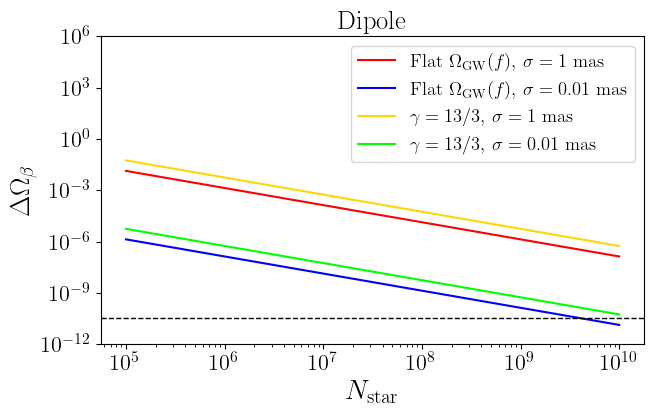

In [15]:
nI_1 = 0
nI_2 = -7/3
factor11 = 0.65
n_Omega = 2/3
N = np.arange(10e4, 10e9, 10000)

D_OmegaGW_dip_1 = deltaI0_dipoleTimesbeta( sigma3, N, factor11, nI_3)*conversion
D_OmegaGW_dip_2 = deltaI0_dipoleTimesbeta( sigma2, N, factor11, nI_3)*conversion
D_OmegaGW_dip_3 = deltaI0_dipoleTimesbeta( sigma3, N, factor11, nI_2)*conversion
D_OmegaGW_dip_4 = deltaI0_dipoleTimesbeta( sigma2, N, factor11, nI_2)*conversion

plt.figure(figsize=(7, 4))
plt.loglog(N, D_OmegaGW_dip_1, color='r', label='Flat $\Omega_{\mathrm{GW}}(f)$, $\sigma = 1$ mas')
plt.loglog(N, D_OmegaGW_dip_2, color='b', label='Flat $\Omega_{\mathrm{GW}}(f)$, $\sigma = 0.01$ mas')
plt.loglog(N, D_OmegaGW_dip_3, color='gold', label='$\gamma = 13/3$, $\sigma = 1$ mas')
plt.loglog(N, D_OmegaGW_dip_4, color='lime', label='$\gamma = 13/3$, $\sigma = 0.01$ mas')
plt.axhline(y=Omega_GW0*(beta*(4-n_Omega)), color='black', linestyle='--', linewidth=1)
plt.ylim(top =10e5)
plt.ylim(bottom =10e-13)

plt.xlabel(r'$N_{\mathrm{star}}$',size=20)
plt.ylabel(r"$\Delta \Omega_{\beta} $",size=20)
plt.title("Dipole")
plt.legend(loc='upper right', fontsize='small')
#plt.grid(True)

ybeta=Omega_GW0*(beta*(4-n_Omega))
print(ybeta)
plt.savefig("Forecast_Dipole_OmTimesbeta.pdf", bbox_inches='tight')

In [ ]:
nI_1 = 0
nI_2 = -7/3
factor11 = 0.65
N = np.arange(1000, 10e11, 10000)

D_OmegaGW_dip_1 = deltaI0_dipole( 2e-7, N, factor11, nI_1)*conversion
D_OmegaGW_dip_2 = deltaI0_dipole( 5e-11, N, factor11, nI_1)*conversion
D_OmegaGW_dip_3 = deltaI0_dipole( 2e-7, N, factor11, nI_2)*conversion
D_OmegaGW_dip_4 = deltaI0_dipole( 5e-11, N, factor11, nI_2)*conversion

plt.figure(figsize=(7, 4))
plt.loglog(N, D_OmegaGW_dip_1, color='r', label='Flat $I(f)$, $\sigma = 2 \\times 10^{-7}$')
plt.loglog(N, D_OmegaGW_dip_2, color='b', label='Flat $I(f)$, $\sigma = 5 \\times 10^{-11}$')
plt.loglog(N, D_OmegaGW_dip_3, color='gold', label='$\gamma = 13/3$, $\sigma = 2 \\times 10^{-7}$')
plt.loglog(N, D_OmegaGW_dip_4, color='lime', label='$\gamma = 13/3$, $\sigma = 5 \\times 10^{-11}$')
plt.axhline(y=Omega_GW0, color='black', linestyle='--', linewidth=1)
plt.ylim(bottom =10e-13)
plt.xlabel(r'$N_{stars}$',size=16)
plt.ylabel(r"$\Delta \Omega_{GW ,0} $",size=16)
#plt.ylabel(r"$\Delta \Omega_{\beta ,0} $",size=16)
plt.title("Dipole")
plt.legend()
#plt.grid(True)

plt.savefig("Forecast_Dipole.pdf", bbox_inches='tight')
